In [1098]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')
%matplotlib inline
import pandas_datareader.data as web
import yfinance

import datetime as dt
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [1099]:
"""
dax = web.DataReader("^GDAXI", 
                       start='2017-6-1', 
                       end='2020-6-1', 
                       data_source='yahoo')

sp500 = web.DataReader("^GSPC", 
                       start='2017-6-1', 
                       end='2020-6-1', 
                       data_source='yahoo')

nikkei = web.DataReader("^N225", 
                       start='2017-6-1', 
                       end='2020-6-1', 
                       data_source='yahoo')

hsi = web.DataReader("^HSI", 
                       start='2017-6-1', 
                       end='2020-6-1', 
                       data_source='yahoo')

ftse = yfinance.download (tickers = "^FTSE",
start = "2017-6-1", #The starting date of our data set
end = "2020-6-1", #The ending date of our data set (at the time of 
interval = "1d", #The distance in time between two recorded observations. 
treads = True)
#
dax.to_csv('data/dax.csv')
sp500.to_csv('data/sp500.csv')
nikkei.to_csv('data/nikkei.csv')
hsi.to_csv('data/hsi.csv')
ftse.to_csv('data/ftse.csv')
"""

'\ndax = web.DataReader("^GDAXI", \n                       start=\'2017-6-1\', \n                       end=\'2020-6-1\', \n                       data_source=\'yahoo\')\n\nsp500 = web.DataReader("^GSPC", \n                       start=\'2017-6-1\', \n                       end=\'2020-6-1\', \n                       data_source=\'yahoo\')\n\nnikkei = web.DataReader("^N225", \n                       start=\'2017-6-1\', \n                       end=\'2020-6-1\', \n                       data_source=\'yahoo\')\n\nhsi = web.DataReader("^HSI", \n                       start=\'2017-6-1\', \n                       end=\'2020-6-1\', \n                       data_source=\'yahoo\')\n\nftse = yfinance.download (tickers = "^FTSE",\nstart = "2017-6-1", #The starting date of our data set\nend = "2020-6-1", #The ending date of our data set (at the time of \ninterval = "1d", #The distance in time between two recorded observations. \ntreads = True)\n#\ndax.to_csv(\'data/dax.csv\')\nsp500.to_csv(\'data/

In [1100]:
dax = pd.read_csv('data/dax.csv',index_col='Date',parse_dates=True)
sp500 = pd.read_csv('data/sp500.csv',index_col='Date',parse_dates=True)
nikkei = pd.read_csv('data/nikkei.csv',index_col='Date',parse_dates=True)
hsi = pd.read_csv('data/hsi.csv',index_col='Date',parse_dates=True)
ftse = pd.read_csv('data/ftse.csv',index_col='Date',parse_dates=True)

In [1101]:
print(sp500.shape)
print(dax.shape)
print(nikkei.shape)
print(hsi.shape)
print(ftse.shape)

(756, 6)
(754, 6)
(732, 6)
(741, 6)
(759, 6)


In [1102]:
print(sp500.index.max()) # to delete row
print(sp500.index.min())
print()
print(dax.index.max())
print(dax.index.min())
print()
print(hsi.index.max()) # to delete row
print(hsi.index.min()) # to delete row
print()
print(ftse.index.max())
print(ftse.index.min())
print()
print(nikkei.index.max()) # to delete row
print(nikkei.index.min()) # to delete row

2020-06-01 00:00:00
2017-05-31 00:00:00

2020-05-29 00:00:00
2017-05-31 00:00:00

2020-06-01 00:00:00
2017-06-01 00:00:00

2020-05-29 00:00:00
2017-05-31 00:00:00

2020-06-01 00:00:00
2017-06-01 00:00:00


In [1103]:
sp500.drop(pd.Timestamp('2020-06-01'),inplace=True)
hsi.drop(pd.Timestamp('2020-06-01'),inplace=True)
hsi.drop(pd.Timestamp('2017-06-01'),inplace=True)
nikkei.drop(pd.Timestamp('2020-06-01'),inplace=True)
nikkei.drop(pd.Timestamp('2017-06-01'),inplace=True)

In [1104]:
print(sp500.shape)
print(dax.shape)
print(nikkei.shape)
print(hsi.shape)
print(ftse.shape)

(755, 6)
(754, 6)
(730, 6)
(739, 6)
(759, 6)


In [1105]:
dax = dax.asfreq('b')
sp500 = sp500.asfreq('b')
nikkei = nikkei.asfreq('b')
hsi = hsi.asfreq('b')
ftse = ftse.asfreq('b')

In [1106]:
print(sp500.shape)
print(dax.shape)
print(nikkei.shape)
print(hsi.shape)
print(ftse.shape)

(783, 6)
(783, 6)
(781, 6)
(781, 6)
(783, 6)


In [1107]:
sp500.drop(['High', 'Low', 'Open', 'Adj Close','Volume'], axis=1, inplace = True)
dax.drop(['High', 'Low', 'Open', 'Adj Close','Volume'], axis=1, inplace = True)
nikkei.drop(['High', 'Low', 'Open', 'Adj Close','Volume'], axis=1, inplace = True)
hsi.drop(['High', 'Low', 'Open', 'Adj Close','Volume'], axis=1, inplace = True)
ftse.drop(['High', 'Low', 'Open', 'Adj Close','Volume'], axis=1, inplace = True)

In [1108]:
sp500.columns = ['sp500_' + str(col) for col in sp500.columns]
dax.columns = ['dax_' + str(col) for col in dax.columns]
nikkei.columns = ['nikkei_' + str(col) for col in nikkei.columns]
hsi.columns = ['hsi_' + str(col) for col in hsi.columns]
ftse.columns = ['ftse_' + str(col) for col in ftse.columns]

In [1109]:
#try3 = pd.merge(dax, nikkei, hsi, ftse, left_index=True, right_index=True)

In [1110]:
indices = pd.concat([sp500, dax, nikkei, hsi, ftse], axis=1)

In [1111]:
indices.isna().sum()

sp500_Close     28
dax_Close       29
nikkei_Close    53
hsi_Close       44
ftse_Close      24
dtype: int64

In [1112]:
indices.shape

(783, 5)

In [1113]:
indices.dropna(inplace=True)

In [1115]:
indices.head()

,sp500_Close,dax_Close,nikkei_Close,hsi_Close,ftse_Close
Date,,,,,
2017-06-02,2439.070068,12822.940430,20177.279297,25924.050781,7547.600098
2017-06-06,2429.330078,12690.120117,19979.900391,25997.140625,7525.000000
2017-06-07,2433.139893,12672.490234,19984.619141,25974.160156,7478.600098
2017-06-08,2433.790039,12713.580078,19909.259766,26063.060547,7450.000000
2017-06-09,2431.770020,12815.719727,20013.259766,26030.289062,7527.299805


In [1116]:
def get_best_gct(gct_output_var, exog_var_name):
    """Returns no. of lags where the p value is lowest"""
    list1=[]
    for nlag in range(1,4,1): # maxlag=3 is standard
        temp_p_value = gct_output_var[nlag][0]['ssr_ftest'][1]
        list1.append(temp_p_value)
    min1 = min(list1) # gets the min value inside list
    min_posn = list1.index(min(list1)) + 1 # Need to plus 1 due to list item length
    print(F'{exog_var_name} minimum P value is {min1} with no.of lag at {min_posn}')

In [1117]:
sp500_hsi = grangercausalitytests(indices[['sp500_Close','hsi_Close']],maxlag=3,verbose=False);
get_best_gct(sp500_hsi,'sp500_hsi')

sp500_hsi minimum P value is 0.025885468449831542 with no.of lag at 2


In [1118]:
sp500_nikkei = grangercausalitytests(indices[['sp500_Close','nikkei_Close']],maxlag=3,verbose=False);
get_best_gct(sp500_nikkei,'sp500_nikkei')

sp500_nikkei minimum P value is 1.8496317846663147e-05 with no.of lag at 2


In [1119]:
sp500_ftse = grangercausalitytests(indices[['sp500_Close','ftse_Close']],maxlag=3,verbose=False);
get_best_gct(sp500_ftse,'sp500_ftse')

sp500_ftse minimum P value is 0.0034131048573265424 with no.of lag at 3


In [1120]:
sp500_dax = grangercausalitytests(indices[['sp500_Close','dax_Close']],maxlag=3,verbose=False);
get_best_gct(sp500_dax,'sp500_dax')

sp500_dax minimum P value is 8.145642020700198e-06 with no.of lag at 3


In [1121]:
nikkei_hsi = grangercausalitytests(indices[['nikkei_Close','hsi_Close']],maxlag=3,verbose=False);
get_best_gct(nikkei_hsi,'nikkei_hsi')

nikkei_hsi minimum P value is 0.7366720785147063 with no.of lag at 1


In [1122]:
indices.to_csv('data/indices.csv')

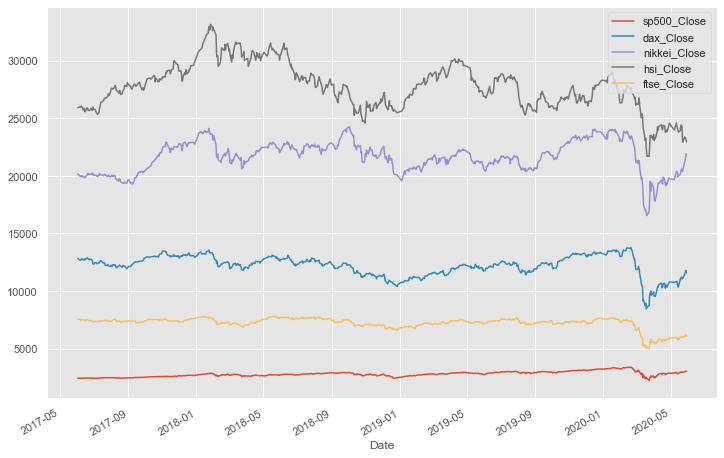

In [1123]:
indices.plot(figsize=(12,8))

In [1124]:
def adf_test(series):
    """Pass in a time series and an optional title, returns an ADF report"""
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis. Data has a unit root and is non-stationary")

In [1125]:
adf_test(indices['sp500_Close'])

ADF test statistic       -2.597335
p-value                   0.093549
# lags used               9.000000
# observations          652.000000
critical value (1%)      -3.440419
critical value (5%)      -2.865983
critical value (10%)     -2.569136
Weak evidence against the null hypothesis
Fail to reject the null hypothesis. Data has a unit root and is non-stationary


In [1126]:
adf_test(indices['dax_Close'])

ADF test statistic       -2.552658
p-value                   0.103182
# lags used               2.000000
# observations          659.000000
critical value (1%)      -3.440312
critical value (5%)      -2.865936
critical value (10%)     -2.569111
Weak evidence against the null hypothesis
Fail to reject the null hypothesis. Data has a unit root and is non-stationary


In [1127]:
adf_test(indices['hsi_Close'])

ADF test statistic       -1.503943
p-value                   0.531560
# lags used               0.000000
# observations          661.000000
critical value (1%)      -3.440282
critical value (5%)      -2.865922
critical value (10%)     -2.569104
Weak evidence against the null hypothesis
Fail to reject the null hypothesis. Data has a unit root and is non-stationary


In [1128]:
adf_test(indices['nikkei_Close'])

ADF test statistic       -3.471854
p-value                   0.008740
# lags used              17.000000
# observations          644.000000
critical value (1%)      -3.440545
critical value (5%)      -2.866038
critical value (10%)     -2.569166
Strong evidence against the null hypothesis
Reject the null hypothesis. Data has no unit root and is stationary


In [1129]:
adf_test(indices['ftse_Close'])

ADF test statistic       -1.727035
p-value                   0.417240
# lags used              19.000000
# observations          642.000000
critical value (1%)      -3.440577
critical value (5%)      -2.866052
critical value (10%)     -2.569173
Weak evidence against the null hypothesis
Fail to reject the null hypothesis. Data has a unit root and is non-stationary


In [1130]:
indices = indices[['sp500_Close','dax_Close']]

In [1131]:
indices.tail(2)

,sp500_Close,dax_Close
Date,,
2020-05-28,3029.729980,11781.129883
2020-05-29,3044.310059,11586.849609


In [1132]:
indices.head(2)

,sp500_Close,dax_Close
Date,,
2017-06-02,2439.070068,12822.940430
2017-06-06,2429.330078,12690.120117


In [1133]:
indices.shape

(662, 2)

In [1134]:
temp1 = indices[['sp500_Close','dax_Close']].to_numpy()
idx1 = pd.date_range('2017-06-02',periods=662,freq='b')

In [1135]:
indices1 = pd.DataFrame(data=temp1,index=idx1,columns=['sp500_Close','dax_Close'])

In [1136]:
indices_diff1 = indices1.diff()

In [1137]:
adf_test(indices_diff1['sp500_Close'])

ADF test statistic     -7.285608e+00
p-value                 1.461617e-10
# lags used             8.000000e+00
# observations          6.520000e+02
critical value (1%)    -3.440419e+00
critical value (5%)    -2.865983e+00
critical value (10%)   -2.569136e+00
Strong evidence against the null hypothesis
Reject the null hypothesis. Data has no unit root and is stationary


In [1138]:
adf_test(indices_diff1['dax_Close'])

ADF test statistic     -1.612680e+01
p-value                 4.832299e-29
# lags used             1.000000e+00
# observations          6.590000e+02
critical value (1%)    -3.440312e+00
critical value (5%)    -2.865936e+00
critical value (10%)   -2.569111e+00
Strong evidence against the null hypothesis
Reject the null hypothesis. Data has no unit root and is stationary


In [1139]:
indices_diff1.shape

(662, 2)

In [1140]:
indices_diff1.dropna(inplace=True)

In [1141]:
indices_diff1.shape

(661, 2)

## train test split

In [1142]:
# num of observations
nobs = 36

In [1143]:
train = indices_diff1[:-nobs] # Start: Begining; End: reverse 18 steps from very end and make it the end point
test = indices_diff1[-nobs:] #  Start: reverse 18 steps from very end and make it the start point; End: The end of df

In [1144]:
print(train.shape)
print(test.shape)

(625, 2)
(36, 2)


In [1145]:
model = VAR(train)

for p in [1,2,3,4,5]:
    results = model.fit(p)
    print('Order =', p)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  16.557482052923632
BIC:  16.600137344927184

Order = 2
AIC:  16.467237526532994
BIC:  16.5384180485039

Order = 3
AIC:  16.480603455780372
BIC:  16.580380242433662

Order = 4
AIC:  16.48975973755788
BIC:  16.618204116744355

Order = 5
AIC:  16.487133966237185
BIC:  16.644317560619218



In [1146]:
results = model.fit(2)

In [1147]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Jun, 2020
Time:                     20:23:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.5384
Nobs:                     623.000    HQIC:                   16.4949
Log likelihood:          -6887.54    FPE:                1.41785e+07
AIC:                      16.4672    Det(Omega_mle):     1.39536e+07
--------------------------------------------------------------------
Results for equation sp500_Close
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.792012         1.394683            0.568           0.570
L1.sp500_Close        -0.299316         0.052480           -5.703           0.000
L1.dax_Close           0.015686         0.013001  

In [1148]:
# grab 2 lagged values right before test starts, get it from the last 2 rows of the train

lagged_values = train.values[-2:] # the p value we need

In [1149]:
# p * k
# p = 2  (lag value)
# k = 2 (sp500 and dax)

fcast36 = results.forecast(y = lagged_values, steps= 36)

In [1150]:
indices.head()

,sp500_Close,dax_Close
Date,,
2017-06-02,2439.070068,12822.940430
2017-06-06,2429.330078,12690.120117
2017-06-07,2433.139893,12672.490234
2017-06-08,2433.790039,12713.580078
2017-06-09,2431.770020,12815.719727


In [1151]:
idx = pd.date_range('2020-03-27',periods=36,freq='b')

In [1152]:
idx

DatetimeIndex(['2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', freq='B')

In [1153]:
test.head()

,sp500_Close,dax_Close
2019-10-28,-88.600098,-368.440430
2019-10-29,85.179932,183.450195
2019-10-30,-42.059814,119.870117
2019-10-31,-114.090088,-391.089844
2019-11-01,56.399902,26.070312


In [1154]:
df_forecast = pd.DataFrame(data=fcast36,index=idx,columns=['sp500_Close_1d','dax_Close_1d'])

In [1155]:
print(df_forecast .index.max())
print(df_forecast .index.min())

2020-05-15 00:00:00
2020-03-27 00:00:00


In [1156]:
df_forecast.head()

,sp500_Close_1d,dax_Close_1d
2020-03-27,-30.122066,111.549624
2020-03-30,21.664181,48.574280
2020-03-31,3.506995,7.026668
2020-04-01,3.622995,11.691624
2020-04-02,0.437453,-0.195834


In [1157]:
df_forecast['sp500_Close'] = (indices['sp500_Close'].iloc[-nobs-1]) + df_forecast['sp500_Close_1d'].cumsum()
df_forecast['dax_Close'] = (indices['dax_Close'].iloc[-nobs-1]) + df_forecast['dax_Close_1d'].cumsum()

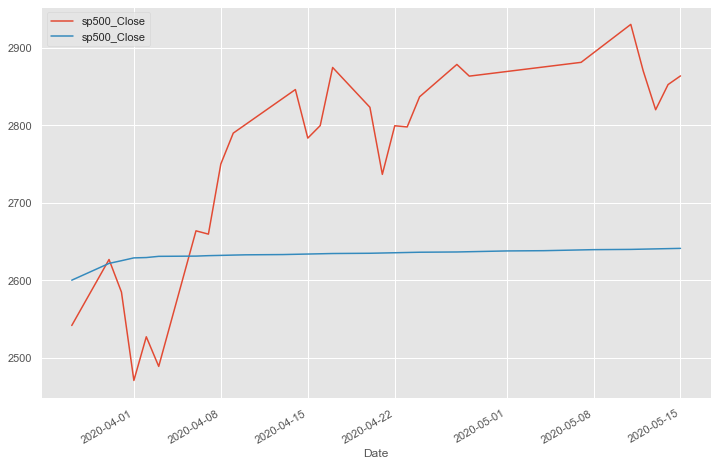

In [1158]:
#test_range = indices[-nobs:]
indices['sp500_Close']['2020-03-27':'2020-05-15'].plot(legend=True,figsize=(12,8))
df_forecast['sp500_Close'].plot(legend=True)

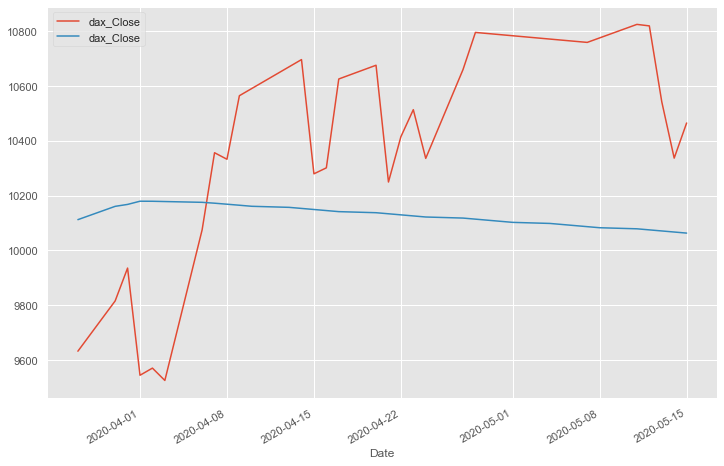

In [1159]:
indices['dax_Close']['2020-03-27':'2020-05-15'].plot(legend=True,figsize=(12,8))
df_forecast['dax_Close'].plot(legend=True)

In [1160]:
indices.head()

,sp500_Close,dax_Close
Date,,
2017-06-02,2439.070068,12822.940430
2017-06-06,2429.330078,12690.120117
2017-06-07,2433.139893,12672.490234
2017-06-08,2433.790039,12713.580078
2017-06-09,2431.770020,12815.719727


In [1161]:
RMSE1 = rmse(indices['sp500_Close'][-nobs:], df_forecast['sp500_Close'])
print(f'sp500 VAR(2) RMSE: {RMSE1:.3f}')

RMSE2 = rmse(indices['dax_Close'][-nobs:], df_forecast['dax_Close'])
print(f'dax VAR(2) RMSE: {RMSE2:.3f}')

sp500 VAR(2) RMSE: 230.782
dax VAR(2) RMSE: 753.531


In [1162]:
indices['sp500_Close'][-nobs:].mean()

2811.463324652778

In [1163]:
indices['dax_Close'][-nobs:].mean()

10574.49134657118

In [1164]:
fcast662 = results.forecast(y = lagged_values, steps= 662)

In [1165]:
idx662 = pd.date_range('2017-06-02',periods=662,freq='D')

In [1166]:
df_forecast662 = pd.DataFrame(data=fcast662,index=idx662,columns=['sp500_Close_1d','dax_Close_1d'])

In [1167]:
df_forecast662.head()

,sp500_Close_1d,dax_Close_1d
2017-06-02,-30.122066,111.549624
2017-06-03,21.664181,48.574280
2017-06-04,3.506995,7.026668
2017-06-05,3.622995,11.691624
2017-06-06,0.437453,-0.195834


In [1168]:
df_forecast662['sp500_Close'] = (indices['sp500_Close'].iloc[0]) + df_forecast['sp500_Close_1d'].cumsum()
df_forecast662['dax_Close'] = (indices['dax_Close'].iloc[0]) + df_forecast['dax_Close_1d'].cumsum()

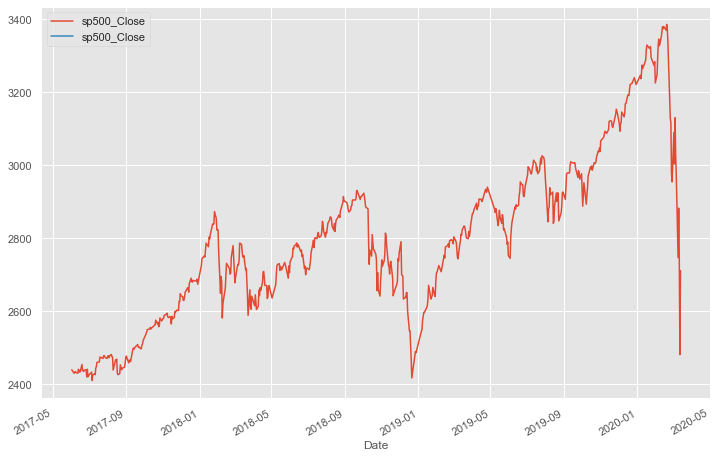

In [1169]:
indices['sp500_Close'][:'2020-03-15'].plot(legend=True,figsize=(12,8))
df_forecast662['sp500_Close'].plot(legend=True)